# Case Study 1 : Collecting Data from Twitter

# Problem 1: Sampling Twitter Data with Streaming API about a Certain Topic

* First, inserting Twitter API credentials

In [3]:
import twitter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://dev.twitter.com/apps/new to create an app and get values
    # for these credentials, which you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
    # for more information on Twitter's OAuth implementation.
    
    CONSUMER_KEY = ''
    CONSUMER_SECRET =''
    OAUTH_TOKEN = ''
    OAUTH_TOKEN_SECRET = ''
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

twitter_api = oauth_login()

* Select and include a case topic that you are interested in, for example, "WPI" or "Lady Gaga" or COVID-19.
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. It would be recommended that the number of tweets should be larger than 1000, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [4]:
import json

q = 'CNBC' 

count = 100  #should be between 1,000 and 1,000,000

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

#Printing all the information stored in a single tweet entry
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Tue Feb 22 18:02:55 +0000 2022",
 "id": 1496183737805066242,
 "id_str": "1496183737805066242",
 "text": "RT @ewarren: This CEO bragged about their \u201cpricing power.\u201d Let me translate that from economist-speak: they can raise prices &amp; extract prof\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "ewarren",
    "name": "Elizabeth Warren",
    "id": 357606935,
    "id_str": "357606935",
    "indices": [
     3,
     11
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen

In [5]:
#Save tweets to json file
import io, json

filename = 'TweetsCNBC'

with open('{0}.json'.format(filename),
              'w', encoding='utf-8') as f:
    json.dump(statuses, f, ensure_ascii=False)


In [6]:
#Printing the first 5 tweets (just the text) just to see what the data looks like
for i in range(5):
    print()
    print(statuses[i]['text'])


RT @ewarren: This CEO bragged about their “pricing power.” Let me translate that from economist-speak: they can raise prices &amp; extract prof…

RT @DogelonMars: Soon. https://t.co/Juyhh6dDJO

RT @candies2639: Germany halts certification of Nord Stream 2 amid Russia-Ukraine crisis https://t.co/MLCvibqp2b

RT @FirzaHusainID: Transformasi BUMN mulai menunjukkan hasil, laba yg bisa menjadi pemasukan deviden negara sentuh 90 Trilyun, bayangkan da…

Will Putin's troops stop in eastern Ukraine? The world waits for Russia's next move https://t.co/sKtkGdsHYi


# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [7]:
#Creating list with all 'text' attributes from tweets stored in 'statuses' variable
status_texts = [ status['text'] 
                 for status in statuses ]

#Creating list of words from all texts stored in 'status_texts', split into words
words = [ w 
          for t in status_texts 
              for w in t.split() ]

#Creating pairs from words and their frequencies
from collections import Counter
c = Counter(words)

#Printing the 30 most common
print(c.most_common()[:30]) # top 30 words

[('RT', 270), ('the', 190), ('to', 131), ('@CNBC', 109), ('and', 100), ('of', 92), ('in', 82), ('&amp;', 81), ('that', 76), ('a', 76), ('are', 76), ('can', 71), ('CEO', 70), ('from', 64), ('on', 64), ('they', 62), ('prices', 60), ('is', 60), ('about', 59), ('This', 56), ('@CNBC:', 56), ('for', 53), ('their', 52), ('me', 51), ('Let', 50), ('raise', 50), ('@ewarren:', 49), ('bragged', 49), ('“pricing', 49), ('power.”', 49)]


In [8]:
#Plot it in table format

from prettytable import PrettyTable

pt = PrettyTable(field_names=['Word', 'Count']) 
c = Counter(words)
[ pt.add_row(kv) for kv in c.most_common()[:10] ]
pt.align['Word'], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt)

+-------+-------+
| Word  | Count |
+-------+-------+
| RT    |   270 |
| the   |   190 |
| to    |   131 |
| @CNBC |   109 |
| and   |   100 |
| of    |    92 |
| in    |    82 |
| &amp; |    81 |
| that  |    76 |
| a     |    76 |
+-------+-------+


**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [9]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

'''
For each tweet in 'statuses' variable, if one of the keys is 'retweeted status', 
then get and store as tuple 
'''

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Displays first 10 tweets from the sorted results and display on table

pt = PrettyTable(field_names=['Retweet Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)


+---------------+-------------+---------------------+------------------------------------------------+
| Retweet Count | Screen Name | Tweet ID            | Text                                           |
+---------------+-------------+---------------------+------------------------------------------------+
| 17560         | DogelonMars | 1453521233845407746 | RT @DogelonMars: Soon. https://t.co/Juyhh6dDJO |
| 17560         | DogelonMars | 1453521233845407746 | RT @DogelonMars: Soon. https://t.co/Juyhh6dDJO |
| 17560         | DogelonMars | 1453521233845407746 | RT @DogelonMars: Soon. https://t.co/Juyhh6dDJO |
| 17560         | DogelonMars | 1453521233845407746 | RT @DogelonMars: Soon. https://t.co/Juyhh6dDJO |
| 17560         | DogelonMars | 1453521233845407746 | RT @DogelonMars: Soon. https://t.co/Juyhh6dDJO |
| 17560         | DogelonMars | 1453521233845407746 | RT @DogelonMars: Soon. https://t.co/Juyhh6dDJO |
| 17560         | DogelonMars | 1453521233845407746 | RT @DogelonMars: So

**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags and top 10 user mentions that are the most popular in your collection of tweets.

In [10]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#Creating list with all 'hashtags' from 'entities' attributes of tweets stored in 'statuses' variable
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

#User mentions
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

for label, data in (('Hashtag', hashtags),
                    ('Mentioned User', screen_names)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+------------------+-------+
| Hashtag          | Count |
+------------------+-------+
| Metaverse        |    19 |
| Airdrop          |    14 |
| FoxNews          |    10 |
| investinyou      |    10 |
| Crypto           |     9 |
| TrumpCrimeFamily |     7 |
| Markets          |     7 |
| Economy          |     7 |
| BBCNews          |     6 |
| antitrust        |     6 |
+------------------+-------+
+-----------------+-------+
| Mentioned User  | Count |
+-----------------+-------+
| CNBC            |   172 |
| CNBCMakeIt      |    54 |
| ewarren         |    49 |
| C_S_Skeptic     |    29 |
| StarshipFairing |    27 |
| Daanos_iii      |    27 |
| JordanPeterj    |    26 |
| _rykllan        |    24 |
| in_rorschach    |    21 |
| OrignalVentures |    16 |
+-----------------+-------+


# Problem 3: Getting "All" Friends and "All" Followers of a Popular User in Twitter

* Choose a popular twitter user who has many followers in the collected tweets of your case topic.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers, and their screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers, and their screen names in a table.

In [11]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [12]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary








# Problem 4: Domain Question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a question, which Twitter data could help answer from your collected tweets, based upon your case topic of your chosen public organization, private company, social community, etc., in a domain.
* How could Twitter data help that company/organization/community spend its resources to answer the above question?

In [150]:
#Getting data posted by user @CNBC
import sys
import time
from urllib.error import URLError
from http.client import BadStatusLine

def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw): 
    
    # A nested helper function that handles common HTTPErrors. Return an updated
    # value for wait_period if the problem is a 500 level error. Block until the
    # rate limit is reset if it's a rate limiting issue (429 error). Returns None
    # for 401 and 404 errors, which requires special handling by the caller.
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
    
        if wait_period > 3600: # Seconds
            print('Too many retries. Quitting.', file=sys.stderr)
            raise e
    
        # See https://developer.twitter.com/en/docs/basics/response-codes
        # for common codes
    
        if e.e.code == 401:
            print('Encountered 401 Error (Not Authorized)', file=sys.stderr)
            return None
        elif e.e.code == 404:
            print('Encountered 404 Error (Not Found)', file=sys.stderr)
            return None
        elif e.e.code == 429: 
            print('Encountered 429 Error (Rate Limit Exceeded)', file=sys.stderr)
            if sleep_when_rate_limited:
                print("Retrying in 15 minutes...ZzZ...", file=sys.stderr)
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print('...ZzZ...Awake now and trying again.', file=sys.stderr)
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print('Encountered {0} Error. Retrying in {1} seconds'\
                  .format(e.e.code, wait_period), file=sys.stderr)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e

    # End of nested helper function
    
    wait_period = 2 
    error_count = 0 

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError as e:
            error_count = 0 
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError as e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print("URLError encountered. Continuing.", file=sys.stderr)
            if error_count > max_errors:
                print("Too many consecutive errors...bailing out.", file=sys.stderr)
                raise
        except BadStatusLine as e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print("BadStatusLine encountered. Continuing.", file=sys.stderr)
            if error_count > max_errors:
                print("Too many consecutive errors...bailing out.", file=sys.stderr)
                raise



def harvest_user_timeline(twitter_api, screen_name=None, user_id=None, max_results=1000):
     
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"    
    
    kw = {  # Keyword args for the Twitter API call
        'count': 200,
        'trim_user': 'true',
        'include_rts' : 'true',
        'since_id' : 1
        }
    
    if screen_name:
        kw['screen_name'] = screen_name
    else:
        kw['user_id'] = user_id
        
    max_pages = 16
    results = []
    
    tweets = make_twitter_request(twitter_api.statuses.user_timeline, **kw)
    
    if tweets is None: # 401 (Not Authorized) - Need to bail out on loop entry
        tweets = []
        
    results += tweets
    
    print('Fetched {0} tweets'.format(len(tweets)), file=sys.stderr)
    
    page_num = 1
    
    # Many Twitter accounts have fewer than 200 tweets so you don't want to enter
    # the loop and waste a precious request if max_results = 200.
    
    # Note: Analogous optimizations could be applied inside the loop to try and 
    # save requests. e.g. Don't make a third request if you have 287 tweets out of 
    # a possible 400 tweets after your second request. Twitter does do some 
    # post-filtering on censored and deleted tweets out of batches of 'count', though,
    # so you can't strictly check for the number of results being 200. You might get
    # back 198, for example, and still have many more tweets to go. If you have the
    # total number of tweets for an account (by GET /users/lookup/), then you could 
    # simply use this value as a guide.
    
    if max_results == kw['count']:
        page_num = max_pages # Prevent loop entry
    
    while page_num < max_pages and len(tweets) > 0 and len(results) < max_results:
    
        # Necessary for traversing the timeline in Twitter's v1.1 API:
        # get the next query's max-id parameter to pass in.
        # See https://dev.twitter.com/docs/working-with-timelines.
        kw['max_id'] = min([ tweet['id'] for tweet in tweets]) - 1 
    
        tweets = make_twitter_request(twitter_api.statuses.user_timeline, **kw)
        results += tweets

        print('Fetched {0} tweets'.format(len(tweets)),file=sys.stderr)
    
        page_num += 1
        
    print('Done fetching tweets', file=sys.stderr)

    return results

In [151]:
tweets = harvest_user_timeline(twitter_api, screen_name="CNBC", max_results=100)

Fetched 200 tweets
Done fetching tweets


In [152]:
status_texts = [ tweet['text'] 
                 for tweet in tweets]
status_texts[0:15]

['Harvard psychologist to parents: Do these 7 things if you want to raise kids with flexible, resilient brains. (via… https://t.co/TgqDItloku',
 'RT @Grow_mag: Here are ways to turn down the volume and the stress when it comes to market turbulence. https://t.co/HSUk2aS0FK',
 "One key to Home Depot's growth strategy: Nabbing bigger orders from home professionals https://t.co/NDufznrGIO",
 "Russia's Ukraine incursion could complicate the Federal Reserve's interest rate decisions https://t.co/4JvcWKxabD",
 'These commodity ETFs can help hedge against geopolitical tensions, market analyst says (via @ETFEdgeCNBC) https://t.co/bXSthTtIQr',
 "Investing Club: We're buying more of our newest portfolio stock as market swings intensify https://t.co/f92D9pJozH",
 '77% of homebuyers face unexpected repair costs in first year of ownership. How to head off surprise expenses https://t.co/q8GOpkKs6W',
 'RT @CNBCTheExchange: Expect elevated #energy prices and stock market volatility during this period o

In [153]:
#----------------------------------------------
#Transforming tweets into TF-IDF vectors in order to be clustered

#Before we begin - importing libraries
import nltk
from nltk.corpus import stopwords
import string

stopwords = nltk.corpus.stopwords.words('english')+['rt','cnbc']
alphanum = string.ascii_lowercase+'0123456789'+"'"

In [154]:
#1ST step - Tokenizing words
tokenized = [ [w for w in t.split() ] for t in status_texts ]
len(tokenized)

200

In [155]:
#2nd step - all lowercase, remove unwanted characters, remove stopwords
for t in tokenized:
    for w in range(len(t)):
        t[w] =t[w].lower() #every letter lowercase
        for letter in t[w]:
            if letter not in alphanum: #remove strange symbols
                t[w]= t[w].replace(letter,"")
        if ((t[w] in stopwords) or len(t[w])<2): #delete stopwords and solitary characters
            t[w] = ""
    while "" in t:
        t.remove("")        

In [156]:
#3rd step - lemmatizing and stemming
#initialize functions
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

In [157]:
#lemmatizing text
for t in range(len(tokenized)):
    lemmatized = []
    for w in tokenized[t]:
        lemmatized.append(lemmatizer.lemmatize(w))
    tokenized[t]=lemmatized

In [158]:
#stemming text
for t in range(len(tokenized)):
    stemmed = []
    for w in tokenized[t]:
        stemmed.append(stemmer.stem(w))
    tokenized[t]=stemmed

In [159]:
#4th step - defining the corpus
corpus = []
for t in range(len(tokenized)):
    untoken = ''
    for w in tokenized[t]:
        untoken = untoken+w+' '
    corpus.append(untoken)
corpus[:5]

['harvard psychologist parent thing want rais kid flexibl resili brain via httpstcotgqditloku ',
 'growmag way turn volum stress come market turbul httpstcohsuk2as0fk ',
 "one key home depot' growth strategi nab bigger order home profession httpstcondufznrgio ",
 "russia' ukrain incurs could complic feder reserve' interest rate decis httpstco4jvcwkxabd ",
 'commod etf help hedg geopolit tension market analyst say via etfedgecnbc httpstcobxsthttiqr ']

In [160]:
#5th step - Indexing it as TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [296]:
vectorizer = TfidfVectorizer(min_df=0.01)
X = vectorizer.fit_transform(corpus)
print("Number of features (words): "+str(len(vectorizer.get_feature_names())))
print("Sample indexed tweet: ")
print(str(vectorizer.transform([corpus[0]])))
print("Features in sample tweet: "+str(vectorizer.inverse_transform(X[0])))

Number of features (words): 347
Sample indexed tweet: 
  (0, 329)	0.4104889456701233
  (0, 322)	0.3144128956891697
  (0, 303)	0.4300033377901882
  (0, 234)	0.3945445263478367
  (0, 212)	0.4300033377901882
  (0, 137)	0.4551617648864387
Features in sample tweet: [array(['via', 'rais', 'want', 'thing', 'parent', 'harvard'], dtype='<U18')]


In [162]:
#6th step - Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [163]:
ks = [i for i in range(1,16)]
inertias = []
sil = []
for k in ks:
    print('KMeans Clustering, number of clusters = ', k) 
    kmeans = KMeans(k).fit(X)
    #print('KMeans Inertia: ', kmeans.inertia_, '\n')
    inertias.append(kmeans.inertia_)
    if k!=1:
        sil.append(silhouette_score(X, kmeans.labels_))

KMeans Clustering, number of clusters =  1
KMeans Clustering, number of clusters =  2
KMeans Clustering, number of clusters =  3
KMeans Clustering, number of clusters =  4
KMeans Clustering, number of clusters =  5
KMeans Clustering, number of clusters =  6
KMeans Clustering, number of clusters =  7
KMeans Clustering, number of clusters =  8
KMeans Clustering, number of clusters =  9
KMeans Clustering, number of clusters =  10
KMeans Clustering, number of clusters =  11
KMeans Clustering, number of clusters =  12
KMeans Clustering, number of clusters =  13
KMeans Clustering, number of clusters =  14
KMeans Clustering, number of clusters =  15


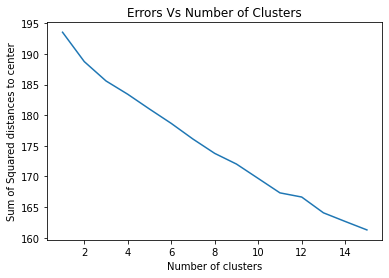

In [165]:
plt.plot(ks, inertias)
plt.title('Errors Vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared distances to center')
plt.show()

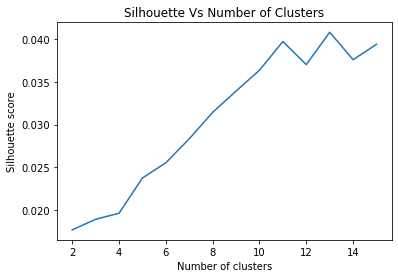

In [166]:
plt.plot(ks[1:], sil)
plt.title('Silhouette Vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [167]:
#Choosing the cluster number with highest silhouette value
k = sil.index(max(sil))+2
print('KMeans Clustering, number of clusters = ', k) 
kmeans = KMeans(k).fit(X)

KMeans Clustering, number of clusters =  13


In [372]:
#Top words for each cluster

In [299]:
#Recreates corpus based only on tfidf attributes (selected words)
newcorpus = vectorizer.inverse_transform(X)
newcorpus[0:4]

[array(['via', 'rais', 'want', 'thing', 'parent', 'harvard'], dtype='<U18'),
 array(['market', 'come', 'turn', 'way', 'growmag'], dtype='<U18'),
 array(['order', 'strategi', 'growth', 'depot', 'home', 'one'],
       dtype='<U18'),
 array(['decis', 'rate', 'interest', 'feder', 'could', 'incurs', 'ukrain',
        'russia'], dtype='<U18')]

In [371]:
# Displays top 10 words from each cluster
for i in range(k):
    pt = PrettyTable(field_names=['Top Words Cluster '+str(i), 'Count'])
    words = [ w for t in range(len(newcorpus)) if kmeans.labels_[t]==i  for w in newcorpus[t] ]
    c = Counter(words)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align['Word'], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+---------------------+-------+
| Top Words Cluster 0 | Count |
+---------------------+-------+
|         say         |    11 |
|        stock        |     6 |
|        presid       |     5 |
|         big         |     4 |
|       million       |     4 |
|      squawkcnbc     |     4 |
|        ukrain       |     4 |
|        covid        |     3 |
|        devic        |     3 |
|         end         |     3 |
+---------------------+-------+
+---------------------+-------+
| Top Words Cluster 1 | Count |
+---------------------+-------+
|         via         |    10 |
|         way         |     6 |
|      cnbcmakeit     |     5 |
|         make        |     4 |
|         want        |     3 |
|        market       |     3 |
|         year        |     3 |
|        fight        |     3 |
|    thenewsoncnbc    |     3 |
|         rais        |     2 |
+---------------------+-------+
+---------------------+-------+
| Top Words Cluster 2 | Count |
+---------------------+-------+
|     ru

In [278]:
#Number of tweets allocated in each cluster
labels = pd.DataFrame(kmeans.labels_).value_counts()
labels.sort_index().values

array([30, 34, 22, 19, 15,  6, 18,  6, 15, 14,  8, 10,  3], dtype=int64)

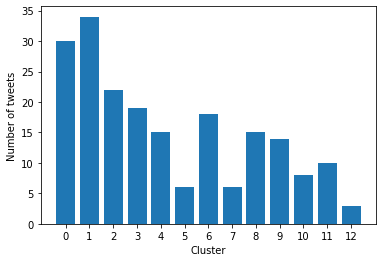

In [279]:
fig, ax = plt.subplots()
ax.bar([str(n)  for n in range(k)],labels.sort_index().values)
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of tweets')

plt.show()

In [ ]:
#What clusters are most popular in terms of retweets

In [182]:
retweets = [ tweet['retweet_count'] for tweet in tweets ]
len(retweets)

200

In [218]:
popularity= []
for i in range(k):
    r = [ retweets[w] for w in range(len(retweets)) if kmeans.labels_[w]==i]
    avgrt = round(sum(r)/len(r),1)
    print("Cluster ",i,": Average retweets per tweet is ",avgrt)
    popularity.append(avgrt)

Cluster  0 : Average retweets per tweet is  14.9
Cluster  1 : Average retweets per tweet is  12.4
Cluster  2 : Average retweets per tweet is  27.2
Cluster  3 : Average retweets per tweet is  40.7
Cluster  4 : Average retweets per tweet is  5.0
Cluster  5 : Average retweets per tweet is  15.8
Cluster  6 : Average retweets per tweet is  9.5
Cluster  7 : Average retweets per tweet is  4.7
Cluster  8 : Average retweets per tweet is  16.5
Cluster  9 : Average retweets per tweet is  7.3
Cluster  10 : Average retweets per tweet is  7.4
Cluster  11 : Average retweets per tweet is  5.0
Cluster  12 : Average retweets per tweet is  4.0


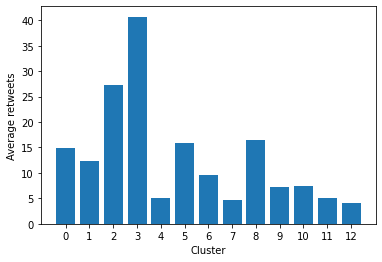

In [230]:
fig, ax = plt.subplots()
ax.bar([str(n)  for n in range(k)],height=popularity)
ax.set_xlabel('Cluster')
ax.set_ylabel('Average retweets')

plt.show()